Jupyter Notebook using Python 3.11.9 for Analysing the recorded data in the data folder and for generating beautiful graphs

In [225]:
# Import required packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats, constants

Parse the Data through pandas

In [226]:
# Load Data
spring_1_data = pd.read_csv('data/spring-1.csv')
spring_2_data = pd.read_csv('data/spring-2.csv')
spring_series_data = pd.read_csv('data/series.csv')
spring_parallel_data = pd.read_csv('data/parallel.csv')

# in Kg
loads = np.array([0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.15, 0.2])

Generate the Newton Force from the weight and the gravitational pull from Earth

In [227]:
loads_data = pd.DataFrame(loads, columns=['weights'])
loads_data['Force'] = [x * constants.g for x in loads_data['weights']]
loads_data

,weights,Force
0,0.00,0.000000
1,0.01,0.098067
2,0.02,0.196133
3,0.03,0.294199
4,0.04,0.392266
5,0.05,0.490333
6,0.10,0.980665
7,0.15,1.470997
8,0.20,1.961330


Analysis for calculating the arithmetic mean for each reading of the value

In [228]:
# Calculate Mean Average from each Row
spring_1_data['Average'] = [np.mean(spring_1_data.to_numpy()[i]) for i in range(spring_1_data.shape[0])]
spring_2_data['Average'] = [np.mean(spring_2_data.to_numpy()[i]) for i in range(spring_2_data.shape[0])]
spring_series_data['Average'] = [np.mean(spring_series_data.to_numpy()[i]) for i in range(spring_series_data.shape[0])]
spring_parallel_data['Average'] = [np.mean(spring_parallel_data.to_numpy()[i]) for i in range(spring_parallel_data.shape[0])]

In [229]:
# Calculate the Standart Deviation from each Row
spring_1_data['Standart Deviation'] = [np.std(spring_1_data.to_numpy()[i][:3], ddof=1, dtype=np.float64) for i in range(spring_1_data.shape[0])]
spring_2_data['Standart Deviation'] = [np.std(spring_1_data.to_numpy()[i][:3], ddof=1, dtype=np.float64) for i in range(spring_2_data.shape[0])]
spring_series_data['Standart Deviation'] = [np.std(spring_1_data.to_numpy()[i][:3], ddof=1, dtype=np.float64) for i in range(spring_series_data.shape[0])]
spring_parallel_data['Standart Deviation'] = [np.std(spring_1_data.to_numpy()[i][:3], ddof=1, dtype=np.float64) for i in range(spring_parallel_data.shape[0])]


In [230]:
spring_1_data['Standart Deviation'].to_numpy()[0] / np.sqrt(3)

np.float64(0.0)

In [231]:
# Calculate the uncertainty of the value
spring_1_data['Uncertainty'] = [np.divide(spring_1_data['Standart Deviation'].to_numpy()[i], np.sqrt(3)) for i in range(spring_1_data.shape[0])]
spring_2_data['Uncertainty'] = [np.divide(spring_2_data['Standart Deviation'].to_numpy()[i], np.sqrt(3)) for i in range(spring_2_data.shape[0])]
spring_series_data['Uncertainty'] = [np.divide(spring_series_data['Standart Deviation'].to_numpy()[i], np.sqrt(3)) for i in range(spring_series_data.shape[0])]
spring_parallel_data['Uncertainty'] = [np.divide(spring_parallel_data['Standart Deviation'].to_numpy()[i], np.sqrt(3)) for i in range(spring_parallel_data.shape[0])]

In [232]:
np.seterr(all='ignore')
spring_1_data['Error Rate'] = [np.divide(*spring_1_data[['Uncertainty','Standart Deviation']].to_numpy()[i]) for i in range(spring_1_data.shape[0])]
spring_2_data['Error Rate'] = [np.divide(*spring_2_data[['Uncertainty','Standart Deviation']].to_numpy()[i]) for i in range(spring_2_data.shape[0])]
spring_series_data['Error Rate'] = [np.divide(*spring_series_data[['Uncertainty','Standart Deviation']].to_numpy()[i]) for i in range(spring_series_data.shape[0])]
spring_parallel_data['Error Rate'] = [np.divide(*spring_parallel_data[['Uncertainty','Standart Deviation']].to_numpy()[i]) for i in range(spring_parallel_data.shape[0])]
np.seterr(all='print')

{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

Calculate the height difference, since we want to know, how much the spring has expanded

In [233]:
# Calculate height difference from reference unloaded
spring_1_data['height'] = [abs(i - spring_1_data['Average'][0]) for i in spring_1_data['Average']]
spring_2_data['height'] = [abs(i - spring_2_data['Average'][0]) for i in spring_2_data['Average']]
spring_series_data['height'] = [abs(i - spring_series_data['Average'][0]) for i in spring_series_data['Average']]
spring_parallel_data['height'] = [abs(i - spring_parallel_data['Average'][0]) for i in spring_parallel_data['Average']]

In [234]:
# Analysis for Spring 1
avg_of_average = np.mean(spring_1_data['Average'])
avg_of_deviation = np.mean(spring_1_data['Standart Deviation'])
avg_of_uncertainty = np.mean(spring_1_data['Uncertainty'])
mean_deviation = np.divide(avg_of_deviation, np.sqrt(9))
relative_error = np.divide(mean_deviation, avg_of_average)
print(f"Average of Average: {avg_of_average} cm")
print(f"Average Standart Deviation: ", avg_of_deviation)
print(f"Average Uncertainty: ", avg_of_uncertainty)
print(f"Mean Deviation: ", mean_deviation)
print(f"relative error: {relative_error * 100} %")
print(f"x = ({avg_of_average:.2f} +- {avg_of_deviation:.2f}) cm")
spring_1_data

Average of Average: 68.84259259259258 cm
Average Standart Deviation:  0.04404557350153169
Average Uncertainty:  0.02542972371772077
Mean Deviation:  0.014681857833843896
relative error: 0.021326706739141103 %
x = (68.84 +- 0.04) cm


,1,2,3,Average,Standart Deviation,Uncertainty,Error Rate,height
0,74.3,74.3,74.30,74.300000,0.000000,0.000000,NaN,0.000000
1,73.4,73.5,73.40,73.433333,0.057735,0.033333,0.57735,0.866667
2,72.6,72.7,72.60,72.633333,0.057735,0.033333,0.57735,1.666667
3,71.8,71.8,71.80,71.800000,0.000000,0.000000,NaN,2.500000
4,71.0,71.0,71.10,71.033333,0.057735,0.033333,0.57735,3.266667
5,70.2,70.1,70.20,70.166667,0.057735,0.033333,0.57735,4.133333
6,66.1,66.1,66.20,66.133333,0.057735,0.033333,0.57735,8.166667
7,62.0,62.0,62.10,62.033333,0.057735,0.033333,0.57735,12.266667
8,58.1,58.0,58.05,58.050000,0.050000,0.028868,0.57735,16.250000


In [235]:
# Analysis for Spring 2
avg_of_average = np.mean(spring_2_data['Average'])
avg_of_deviation = np.mean(spring_2_data['Standart Deviation'])
avg_of_uncertainty = np.mean(spring_2_data['Uncertainty'])
mean_deviation = np.divide(avg_of_deviation, np.sqrt(9))
relative_error = np.divide(mean_deviation, avg_of_average)
print(f"Average of Average: {avg_of_average} cm")
print(f"Average Standart Deviation: ", avg_of_deviation)
print(f"Average Uncertainty: ", avg_of_uncertainty)
print(f"Mean Deviation: ", mean_deviation)
print(f"relative error: {relative_error * 100} %")
print(f"x = ({avg_of_average:.2f} +- {avg_of_deviation:.2f}) cm")
spring_1_data

Average of Average: 68.72777777777777 cm
Average Standart Deviation:  0.04404557350153169
Average Uncertainty:  0.02542972371772077
Mean Deviation:  0.014681857833843896
relative error: 0.02136233457353408 %
x = (68.73 +- 0.04) cm


,1,2,3,Average,Standart Deviation,Uncertainty,Error Rate,height
0,74.3,74.3,74.30,74.300000,0.000000,0.000000,NaN,0.000000
1,73.4,73.5,73.40,73.433333,0.057735,0.033333,0.57735,0.866667
2,72.6,72.7,72.60,72.633333,0.057735,0.033333,0.57735,1.666667
3,71.8,71.8,71.80,71.800000,0.000000,0.000000,NaN,2.500000
4,71.0,71.0,71.10,71.033333,0.057735,0.033333,0.57735,3.266667
5,70.2,70.1,70.20,70.166667,0.057735,0.033333,0.57735,4.133333
6,66.1,66.1,66.20,66.133333,0.057735,0.033333,0.57735,8.166667
7,62.0,62.0,62.10,62.033333,0.057735,0.033333,0.57735,12.266667
8,58.1,58.0,58.05,58.050000,0.050000,0.028868,0.57735,16.250000


In [236]:
# Analysis for Springs in series
avg_of_average = np.mean(spring_series_data['Average'])
avg_of_deviation = np.mean(spring_series_data['Standart Deviation'])
avg_of_uncertainty = np.mean(spring_series_data['Uncertainty'])
mean_deviation = np.divide(avg_of_deviation, np.sqrt(9))
relative_error = np.divide(mean_deviation, avg_of_average)
print(f"Average of Average: {avg_of_average} cm")
print(f"Average Standart Deviation: ", avg_of_deviation)
print(f"Average Uncertainty: ", avg_of_uncertainty)
print(f"Mean Deviation: ", mean_deviation)
print(f"relative error: {relative_error * 100} %")
print(f"x = ({avg_of_average:.2f} +- {avg_of_deviation:.2f}) cm")
spring_1_data

Average of Average: 43.76481481481481 cm
Average Standart Deviation:  0.04404557350153169
Average Uncertainty:  0.02542972371772077
Mean Deviation:  0.014681857833843896
relative error: 0.03354717230260951 %
x = (43.76 +- 0.04) cm


,1,2,3,Average,Standart Deviation,Uncertainty,Error Rate,height
0,74.3,74.3,74.30,74.300000,0.000000,0.000000,NaN,0.000000
1,73.4,73.5,73.40,73.433333,0.057735,0.033333,0.57735,0.866667
2,72.6,72.7,72.60,72.633333,0.057735,0.033333,0.57735,1.666667
3,71.8,71.8,71.80,71.800000,0.000000,0.000000,NaN,2.500000
4,71.0,71.0,71.10,71.033333,0.057735,0.033333,0.57735,3.266667
5,70.2,70.1,70.20,70.166667,0.057735,0.033333,0.57735,4.133333
6,66.1,66.1,66.20,66.133333,0.057735,0.033333,0.57735,8.166667
7,62.0,62.0,62.10,62.033333,0.057735,0.033333,0.57735,12.266667
8,58.1,58.0,58.05,58.050000,0.050000,0.028868,0.57735,16.250000


In [237]:
# Analysis for Springs in parallel
avg_of_average = np.mean(spring_parallel_data['Average'])
avg_of_deviation = np.mean(spring_parallel_data['Standart Deviation'])
avg_of_uncertainty = np.mean(spring_parallel_data['Uncertainty'])
mean_deviation = np.divide(avg_of_deviation, np.sqrt(9))
relative_error = np.divide(mean_deviation, avg_of_average)
print(f"Average of Average: {avg_of_average} cm")
print(f"Average Standart Deviation: ", avg_of_deviation)
print(f"Average Uncertainty: ", avg_of_uncertainty)
print(f"Mean Deviation: ", mean_deviation)
print(f"relative error: {relative_error * 100} %")
print(f"x = ({avg_of_average:.2f} +- {avg_of_deviation:.2f}) cm")
spring_1_data

Average of Average: 71.1222222222222 cm
Average Standart Deviation:  0.04404557350153169
Average Uncertainty:  0.02542972371772077
Mean Deviation:  0.014681857833843896
relative error: 0.020643137088672877 %
x = (71.12 +- 0.04) cm


,1,2,3,Average,Standart Deviation,Uncertainty,Error Rate,height
0,74.3,74.3,74.30,74.300000,0.000000,0.000000,NaN,0.000000
1,73.4,73.5,73.40,73.433333,0.057735,0.033333,0.57735,0.866667
2,72.6,72.7,72.60,72.633333,0.057735,0.033333,0.57735,1.666667
3,71.8,71.8,71.80,71.800000,0.000000,0.000000,NaN,2.500000
4,71.0,71.0,71.10,71.033333,0.057735,0.033333,0.57735,3.266667
5,70.2,70.1,70.20,70.166667,0.057735,0.033333,0.57735,4.133333
6,66.1,66.1,66.20,66.133333,0.057735,0.033333,0.57735,8.166667
7,62.0,62.0,62.10,62.033333,0.057735,0.033333,0.57735,12.266667
8,58.1,58.0,58.05,58.050000,0.050000,0.028868,0.57735,16.250000


Generate required data to be able to graph it on a graph

In [238]:
# Create Plot Data
df_plot_f1 = pd.DataFrame({'force': loads_data['Force'], 'length': spring_1_data['height']})
df_plot_f2 = pd.DataFrame({'force': loads_data['Force'], 'length': spring_2_data['height']})
df_plot_series = pd.DataFrame({'force': loads_data['Force'], 'length': spring_series_data['height']})
df_plot_parallel = pd.DataFrame({'force': loads_data['Force'], 'length': spring_parallel_data['height']})

z_f1 = np.polyfit(df_plot_f1['force'].to_numpy(), df_plot_f1['length'].to_numpy(), 1)
p_f1 = np.poly1d(z_f1)
r_f1 = stats.linregress(df_plot_f1['force'].to_numpy(), df_plot_f1['length'].to_numpy())

z_f2 = np.polyfit(df_plot_f2['force'].to_numpy(), df_plot_f2['length'].to_numpy(), 1)
p_f2 = np.poly1d(z_f2)
r_f2 = stats.linregress(df_plot_f2['force'].to_numpy(), df_plot_f2['length'].to_numpy())

z_series = np.polyfit(df_plot_series['force'].to_numpy(), df_plot_series['length'].to_numpy(), 1)
p_series = np.poly1d(z_series)
r_series = stats.linregress(df_plot_series['force'].to_numpy(), df_plot_series['length'].to_numpy())

z_parallel = np.polyfit(df_plot_parallel['force'].to_numpy(), df_plot_parallel['length'].to_numpy(), 1)
p_parallel = np.poly1d(z_parallel)
r_parallel = stats.linregress(df_plot_parallel['force'].to_numpy(), df_plot_parallel['length'].to_numpy())

In [239]:
loads_data['Force'][8] / spring_1_data['height'][8]

np.float64(0.12069723076923072)

Create Plot for Spring 1

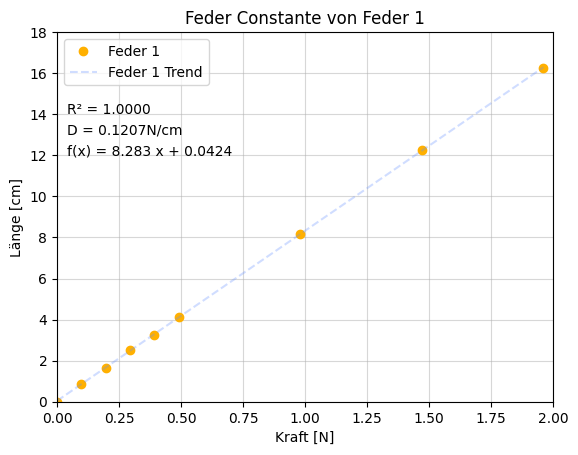

In [240]:
fig = plt.figure()
ax = fig.add_subplot()

major_ticks_x = np.arange(0, 2.1, 0.25)
major_ticks_y = np.arange(0, 19, 2)
ax.set_xticks(major_ticks_x)
ax.set_yticks(major_ticks_y)

ax.grid(visible=True, which='major', axis='both', alpha=0.5)

ax.plot('force', 'length', data=df_plot_f1, linestyle='none', marker='o', color='#ffb000', label='Feder 1')
ax.plot(df_plot_f1['force'], p_f1(df_plot_f1['force']), '--', color='#648fff', label='Feder 1 Trend', alpha=0.3)

ax.set(
    title='Feder Constante von Feder 1',
    xlabel='Kraft [N]',
    ylabel='Länge [cm]',
    xlim=[0, 2],
    ylim=[0, 18]
    )
ax.legend(loc='best')

ax.annotate("R² = {:.4f}".format(r_f1.rvalue**2), xy=(0.04, 14))
ax.annotate("D = {:.4f}N/cm".format(np.divide(loads_data['Force'][8],spring_1_data['height'][8])), xy=(0.04, 13))
ax.annotate("f(x) = {}".format(str(p_f1).lstrip()), xy=(0.04, 12))

plt.show()

Creating Plot for Spring 2

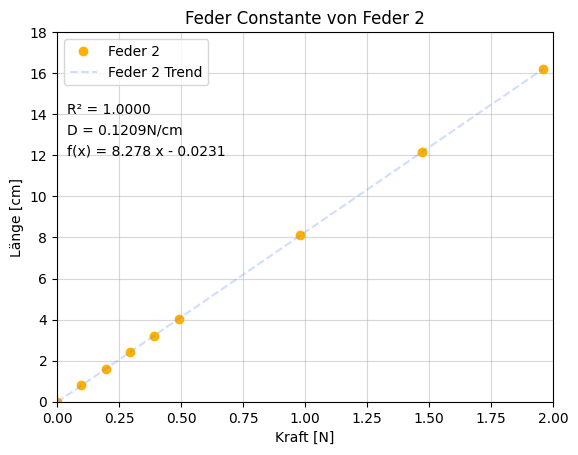

In [241]:
fig = plt.figure()
ax = fig.add_subplot()

major_ticks_x = np.arange(0, 2.1, 0.25)
major_ticks_y = np.arange(0, 19, 2)
ax.set_xticks(major_ticks_x)
ax.set_yticks(major_ticks_y)

ax.grid(visible=True, which='major', axis='both', alpha=0.5)

ax.plot('force', 'length', data=df_plot_f2, linestyle='none', marker='o', color='#ffb000', label='Feder 2')
ax.plot(df_plot_f2['force'], p_f2(df_plot_f2['force']), '--', color='#648fff', label='Feder 2 Trend', alpha=0.3)

ax.set(
    title='Feder Constante von Feder 2',
    xlabel='Kraft [N]',
    ylabel='Länge [cm]',
    xlim=[0, 2],
    ylim=[0, 18]
    )
ax.legend(loc='best')

ax.annotate("R² = {:.4f}".format(r_f2.rvalue**2), xy=(0.04, 14))
ax.annotate("D = {:.4f}N/cm".format(np.divide(loads_data['Force'][8],spring_2_data['height'][8])), xy=(0.04, 13))
ax.annotate("f(x) = {}".format(str(p_f2).lstrip()), xy=(0.04, 12))

plt.show()

Der Vergleich von Feder 1 und 2 in einem Graphen darstellen

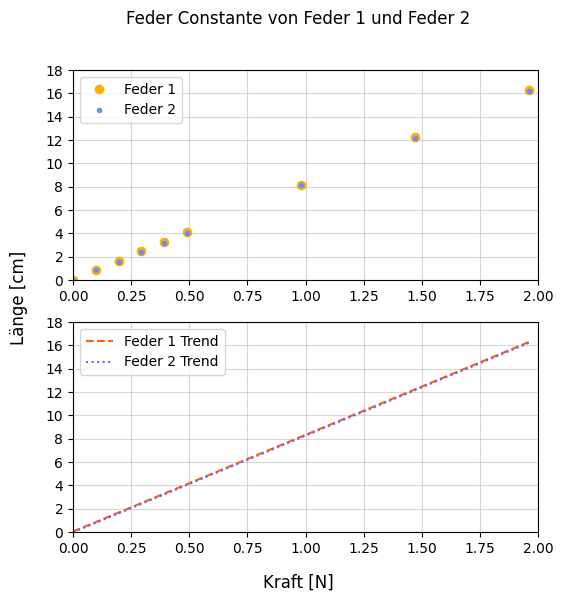

In [242]:
fig = plt.figure(figsize=(6, 6))
ax = fig.subplots(2)

fig.suptitle('Feder Constante von Feder 1 und Feder 2')
fig.supxlabel('Kraft [N]')
fig.supylabel('Länge [cm]')

major_ticks_x = np.arange(0, 2.1, 0.25)
major_ticks_y = np.arange(0, 19, 2)
ax[0].set_xticks(major_ticks_x)
ax[0].set_yticks(major_ticks_y)
ax[1].set_xticks(major_ticks_x)
ax[1].set_yticks(major_ticks_y)

ax[0].grid(visible=True, which='major', axis='both', alpha=0.5)
ax[1].grid(visible=True, which='major', axis='both', alpha=0.5)

ax[0].plot('force', 'length', data=df_plot_f1, linestyle='none', marker='o', color='#ffb000', label='Feder 1')
ax[0].plot('force', 'length', data=df_plot_f2, linestyle='none', marker='.', color='#648fff', label='Feder 2')
ax[1].plot(df_plot_f1['force'], p_f1(df_plot_f1['force']), '--', color='#fe6100', label='Feder 1 Trend')
ax[1].plot(df_plot_f2['force'], p_f2(df_plot_f2['force']), ':', color='#785ef0', label='Feder 2 Trend')

ax[0].set(xlim=[0, 2],ylim=[0, 18])
ax[1].set(xlim=[0, 2],ylim=[0, 18])

ax[0].legend(loc='best')
ax[1].legend(loc='best')

plt.show()

Creating Plot for series setup

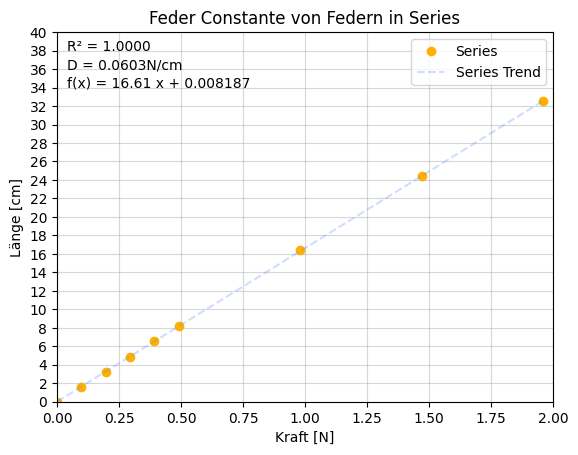

In [243]:
fig = plt.figure()
ax = fig.add_subplot()

major_ticks_x = np.arange(0, 2.1, 0.25)
major_ticks_y = np.arange(0, 41, 2)
ax.set_xticks(major_ticks_x)
ax.set_yticks(major_ticks_y)

ax.grid(visible=True, which='major', axis='both', alpha=0.5)

ax.plot('force', 'length', data=df_plot_series, linestyle='none', marker='o', color='#ffb000', label='Series')
ax.plot(df_plot_series['force'], p_series(df_plot_series['force']), '--', color='#648fff', label='Series Trend', alpha=0.3)

ax.set(
    title='Feder Constante von Federn in Series',
    xlabel='Kraft [N]',
    ylabel='Länge [cm]',
    xlim=[0, 2],
    ylim=[0, 40]
    )
ax.legend(loc='best')

ax.annotate("R² = {:.4f}".format(r_series.rvalue**2), xy=(0.04, 38))
ax.annotate("D = {:.4f}N/cm".format(np.divide(loads_data['Force'][8],spring_series_data['height'][8])), xy=(0.04, 36))
ax.annotate("f(x) = {}".format(str(p_series).lstrip()), xy=(0.04, 34))

plt.show()

Creating Plot for parallel setup

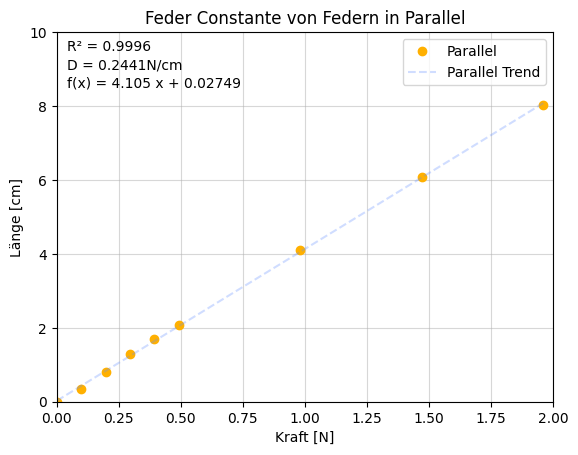

In [244]:
fig = plt.figure()
ax = fig.add_subplot()

major_ticks_x = np.arange(0, 2.1, 0.25)
major_ticks_y = np.arange(0, 11, 2)
ax.set_xticks(major_ticks_x)
ax.set_yticks(major_ticks_y)

ax.plot('force', 'length', data=df_plot_parallel, linestyle='none', marker='o', color='#ffb000', label='Parallel')
ax.plot(df_plot_parallel['force'], p_parallel(df_plot_parallel['force']), '--', color='#648fff', label='Parallel Trend', alpha=0.3)

ax.grid(visible=True, which='major', axis='both', alpha=0.5)

ax.set(
    title='Feder Constante von Federn in Parallel',
    xlabel='Kraft [N]',
    ylabel='Länge [cm]',
    xlim=[0, 2],
    ylim=[0, 10]
    )
ax.legend(loc='best')

ax.annotate("R² = {:.4f}".format(r_parallel.rvalue**2), xy=(0.04, 9.5))
ax.annotate("D = {:.4f}N/cm".format(np.divide(loads_data['Force'][8],spring_parallel_data['height'][8])), xy=(0.04, 9))
ax.annotate("f(x) = {}".format(str(p_parallel).lstrip()), xy=(0.04, 8.5))

plt.show()

Showing the difference a single spring, series springs and parallel springs

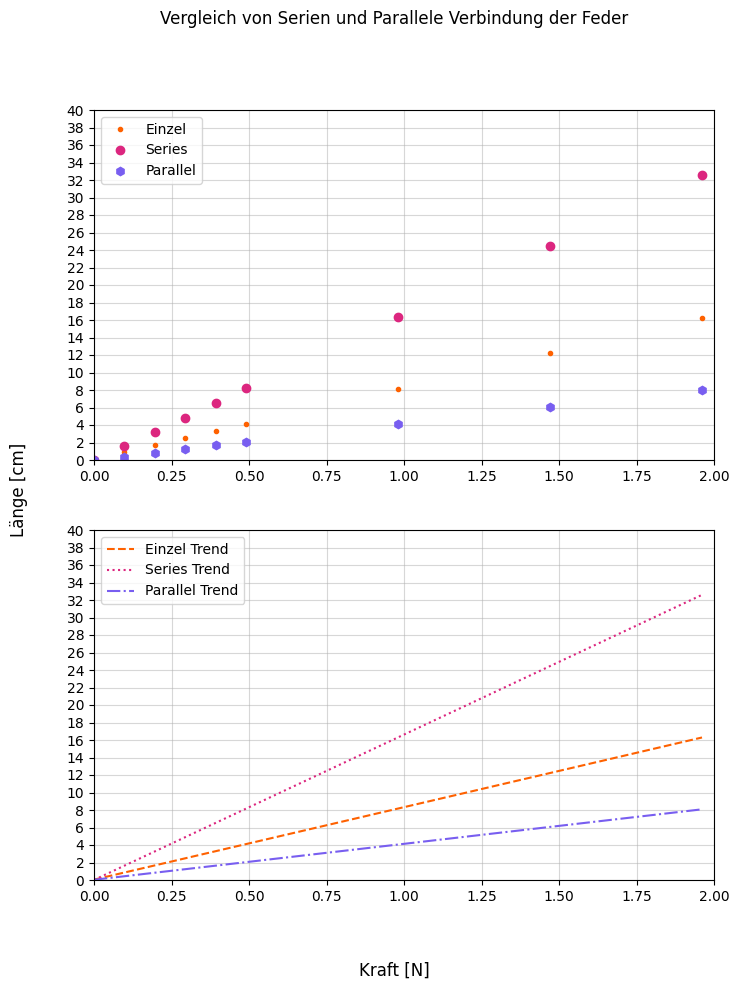

In [246]:
fig = plt.figure(figsize=(8, 10))
ax = fig.subplots(2)

fig.suptitle('Vergleich von Serien und Parallele Verbindung der Feder')
fig.supxlabel('Kraft [N]')
fig.supylabel('Länge [cm]')

major_ticks_x = np.arange(0, 2.1, 0.25)
major_ticks_y = np.arange(0, 41, 2)
ax[0].set_xticks(major_ticks_x)
ax[0].set_yticks(major_ticks_y)
ax[1].set_xticks(major_ticks_x)
ax[1].set_yticks(major_ticks_y)

ax[0].grid(visible=True, which='major', axis='both', alpha=0.5)
ax[1].grid(visible=True, which='major', axis='both', alpha=0.5)

ax[0].plot('force', 'length', data=df_plot_f1, linestyle='none', marker='.', color='#fe6100', label='Einzel')
ax[0].plot('force', 'length', data=df_plot_series, linestyle='none', marker='o', color='#dc267f', label='Series')
ax[0].plot('force', 'length', data=df_plot_parallel, linestyle='none', marker='h', color='#785ef0', label='Parallel')

ax[1].plot('force', p_f1(df_plot_f1['force']), data=df_plot_f1, linestyle='--', color='#fe6100', label='Einzel Trend')
ax[1].plot('force', p_series(df_plot_series['force']), data=df_plot_series, linestyle=':', color='#dc267f', label='Series Trend')
ax[1].plot('force', p_parallel(df_plot_parallel['force']), data=df_plot_parallel, linestyle='-.', color='#785ef0', label='Parallel Trend')

ax[0].set(xlim=[0, 2],ylim=[0, 40])
ax[1].set(xlim=[0, 2],ylim=[0, 40])

ax[0].legend(loc='best')
ax[1].legend(loc='best')

plt.show()
